# Sentiment Forecasting Notebook
This notebooks shows how the TimeGPT generative pre-trained forecasting model was fine-tuned for financial sentiment forecasting.

## Modules

In [23]:

import pandas as pd
from nixtlats import TimeGPT
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr, pearsonr
import numpy as np
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime
import matplotlib.dates as mdates

## Instantiate the TimeGPT class providing credentials

In [132]:

timegpt = TimeGPT(
    # defaults to os.environ.get("TIMEGPT_TOKEN")
    token = '1LHM29IPxWy2EmK5CwkRhQcoWGO3lvcWm0dot5Ax8ab2BHAhAtMSnLvA6hhwe7BvAzke1VvgVzq5T3qUTOzO7RMAx8lRlI6N7HheZ4tsli8WFGreWUWn0vOjqrAY5lGfD8NJMEwFRELZGlGOu2KFoXo1pfXepdcU1LyUnfYsefCF7qXtdtC1Xf9HSNJmUVLl6r1f2AWtJXTBkjd6qixBfJhrdOJaHT9QrpMfX7gUYTdkfbOf6QLu2mACWHmLYa7t'
)

### Test the validate of your token

In [133]:
timegpt.validate_token()

INFO:nixtlats.timegpt:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

## Load and plot your dataset 
This dataset contains the daily sentiemnt scores of financial news headlines from Bloomberg and Reuters between 2007 and 2016.

In [2]:
df = pd.read_csv('/Users/macbook/Desktop/Year3/Dissertation/Coding/Exp2/Results/Sentiment_scores.csv')
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', inplace=True)

In [3]:
df.set_index('date', inplace=True)

## Forecasting with TimeGPT 
- We use monthly window size and extract the historical window of sentiment scores from the dataset based on the given window size. 
- We input this historical data into TimeGPT to make a forecast for the next day.
We store the forecast and the actual sentiment score for that day and repeat this process for each subsequent day, rolling the window forward by one day each time, until it reaches the end of the dataset.

In [7]:
start_date = datetime.datetime(2007,2,1)
end_date = datetime.datetime(2016,8,16)

In [8]:
while start_date <= end_date:
    if start_date in df.index:
        window_end = start_date - pd.DateOffset(days=1)
        window_start = window_end - relativedelta(months=1)
        print(f"window start {window_start}, window end {window_end}, start date {start_date}")
    else:
        print(f"Skipping {start_date} as it is not present in the DataFrame.")

    # Roll the start date to the first day of the next month
    start_date += pd.DateOffset(days=1)

window start 2006-12-31 00:00:00, window end 2007-01-31 00:00:00, start date 2007-02-01 00:00:00
window start 2007-01-01 00:00:00, window end 2007-02-01 00:00:00, start date 2007-02-02 00:00:00
window start 2007-01-02 00:00:00, window end 2007-02-02 00:00:00, start date 2007-02-03 00:00:00
window start 2007-01-03 00:00:00, window end 2007-02-03 00:00:00, start date 2007-02-04 00:00:00
window start 2007-01-04 00:00:00, window end 2007-02-04 00:00:00, start date 2007-02-05 00:00:00
window start 2007-01-05 00:00:00, window end 2007-02-05 00:00:00, start date 2007-02-06 00:00:00
window start 2007-01-06 00:00:00, window end 2007-02-06 00:00:00, start date 2007-02-07 00:00:00
window start 2007-01-07 00:00:00, window end 2007-02-07 00:00:00, start date 2007-02-08 00:00:00
window start 2007-01-08 00:00:00, window end 2007-02-08 00:00:00, start date 2007-02-09 00:00:00
window start 2007-01-09 00:00:00, window end 2007-02-09 00:00:00, start date 2007-02-10 00:00:00
window start 2007-01-10 00:00:

In [ ]:
predictions = []
while start_date <= end_date:
    if start_date in df.index:
        window_end = start_date - pd.DateOffset(days=1)
        window_start = window_end - relativedelta(months=1)

        historical_df = df.loc[window_start:window_end]
        forecast_df = timegpt.forecast(
            df=historical_df.reset_index(),
            h=1,
            freq='D',
            time_col='date',
            target_col='sentiment_score'
        )

        # Get the actual sentiment score for the prediction date
        actual_sentiment = df.loc[start_date, 'sentiment_score']

        # Get the predicted sentiment score from TimeGPT's forecast
        predicted_sentiment = forecast_df['TimeGPT'].values[0]
        predictions.append({
            'start_date': start_date,
            'window_end': window_end,
            'predicted': predicted_sentiment,
            'actual': actual_sentiment
        })
        print(f"window start {window_start}, window end {window_end}, predicted {predicted_sentiment}")
    else:
        print(f"Skipping {start_date} as it is not present in the DataFrame.")

    # Roll the start date to the first day of the next month
    start_date += pd.DateOffset(days=1)

predictions_df = pd.DataFrame(predictions, columns=['start_date', 'window_end', 'predicted', 'actual'])


In [138]:
predictions_df.to_csv('/Users/macbook/Desktop/Year3/Dissertation/Coding/Exp3/Results//Predictions_2016.csv', index=False)

### Creating one DataFrame from all the predictions (2007-2016)


In [4]:
file_paths = [
    '/Users/macbook/Desktop/Year3/Dissertation/Coding/Exp3/Results//Predictions_2007.csv', 
    '/Users/macbook/Desktop/Year3/Dissertation/Coding/Exp3/Results//Predictions_2008.csv', 
    '/Users/macbook/Desktop/Year3/Dissertation/Coding/Exp3/Results//Predictions_2009.csv', 
    '/Users/macbook/Desktop/Year3/Dissertation/Coding/Exp3/Results//Predictions_2010.csv', 
    '/Users/macbook/Desktop/Year3/Dissertation/Coding/Exp3/Results//Predictions_2011.csv', 
    '/Users/macbook/Desktop/Year3/Dissertation/Coding/Exp3/Results//Predictions_2012.csv',
    '/Users/macbook/Desktop/Year3/Dissertation/Coding/Exp3/Results//Predictions_2013.csv',
    '/Users/macbook/Desktop/Year3/Dissertation/Coding/Exp3/Results//Predictions_2014.csv',
    '/Users/macbook/Desktop/Year3/Dissertation/Coding/Exp3/Results//Predictions_2015.csv',
    '/Users/macbook/Desktop/Year3/Dissertation/Coding/Exp3/Results//Predictions_2016.csv'
    ]

In [12]:
# Read each CSV file into a DataFrame and append it to a list
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

combined_df = combined_df.rename(columns={'start_date': 'date'})
combined_df = combined_df.drop('window_end', axis=1)


### Plot the graph illustrating the performance based on sentiment scores by FinBERT

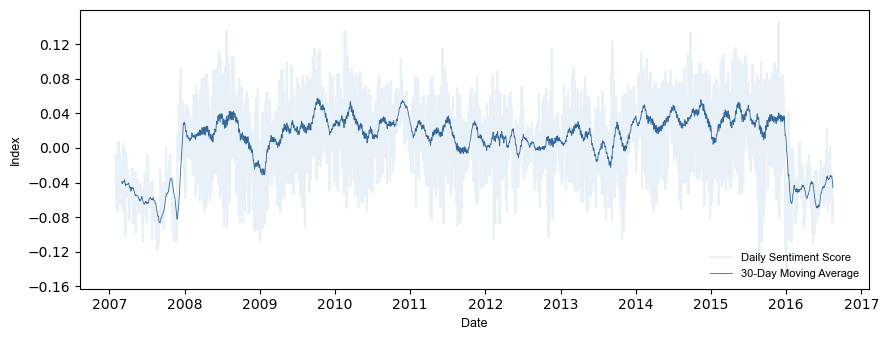

In [21]:
from matplotlib.ticker import MaxNLocator
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df.set_index('date', inplace=True)
combined_df['Moving_Avg'] = combined_df['predicted'].rolling(window=30).mean()
plt.figure(figsize=(9, 3.5))
plt.plot(combined_df.index, combined_df['predicted'], label='Daily Sentiment Score', alpha=0.1)
plt.plot(combined_df.index, combined_df['Moving_Avg'], label='30-Day Moving Average', color=(0.2, 0.4, 0.6), linewidth=0.6)
plt.xlabel('Date', fontsize=9, fontname='Arial')
plt.ylabel('Index', fontsize=9, fontname='Arial')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
legend = plt.legend(fontsize=8, frameon=False, loc='lower right')
for text in legend.get_texts():
    text.set_fontname('Arial')
    text.set_fontsize(8)
plt.tight_layout()
plt.show()

### Comparative Analysis

#### Plot the actual sentiment scores against the predictions produced by TimeGPT
We take the predictions produced by FinBERT as a benchmark.
1. This graph is to represent a visual comparative analysis for each year.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


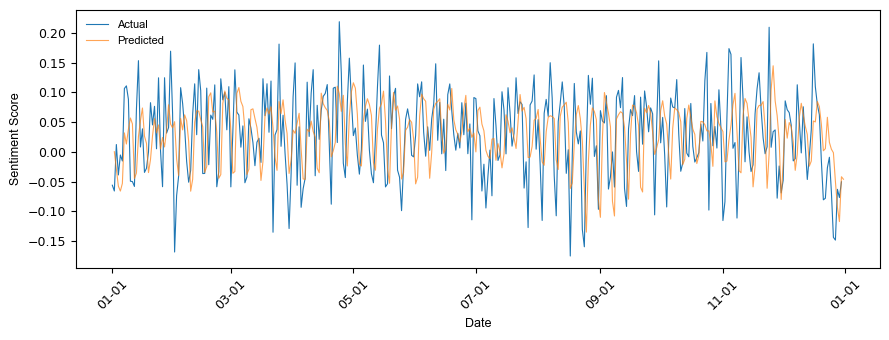

In [7]:
plt.figure(figsize=(9, 3.5))
plt.plot(predictions_df['window_end'], predictions_df['actual'], label='Actual', linewidth=0.8)
plt.plot(predictions_df['start_date'], predictions_df['predicted'], label='Predicted', linewidth=0.8, alpha=0.7)
plt.xlabel('Date', fontsize=9, fontname='Arial')
plt.ylabel('Sentiment Score', fontsize=9, fontname='Arial')
plt.yticks(fontsize=9)
plt.xticks(rotation=45, fontsize=9)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
legend = plt.legend(fontsize=8, frameon=False)
for text in legend.get_texts():
    text.set_fontname('Arial')
    text.set_fontsize(8)
plt.tight_layout()
plt.show()

2. Following code is to represent a visual comparative analysis of the whole dataset from 2007 to 2016.

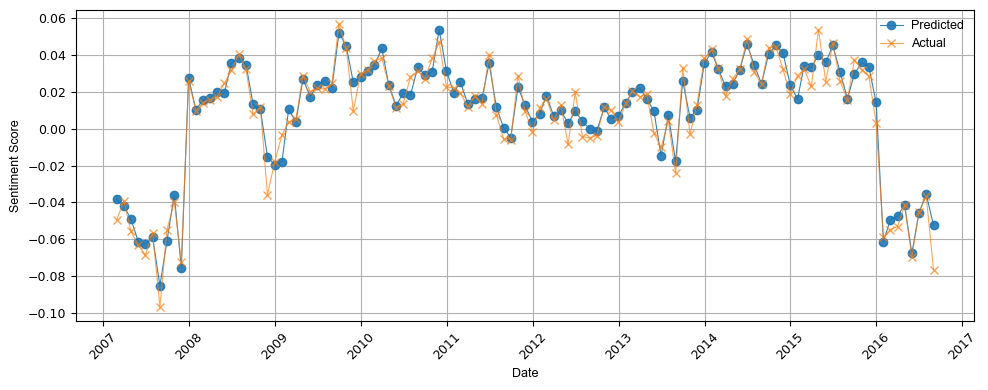

In [265]:
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df.set_index('date', inplace=True)

monthly_data = combined_df.resample('M').mean() 

plt.figure(figsize=(10, 4))
plt.plot(monthly_data.index, monthly_data['predicted'], label='Predicted', marker='o', linewidth=0.8, alpha=0.9)
plt.plot(monthly_data.index, monthly_data['actual'], label='Actual', marker='x', linewidth=0.8, alpha=0.7)
plt.xlabel('Date', fontsize=9, fontname='Arial')
plt.ylabel('Sentiment Score', fontsize=9, fontname='Arial')
plt.grid(True)
plt.yticks(fontsize=9)
plt.xticks(rotation=45, fontsize=9)
legend = plt.legend(fontsize=8, frameon=False)
for text in legend.get_texts():
    text.set_fontname('Arial')
    text.set_fontsize(9)
plt.tight_layout()
plt.show()


#### Calculating the Mean Absolute Error 

In [5]:
mae = mean_absolute_error(combined_df['actual'], combined_df['predicted'])
print("MAE:", mae)

MAE: 0.048383932534321036


#### Calculating the Mean Squared Error

In [6]:
mse = mean_squared_error(combined_df['actual'], combined_df['predicted'])
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 0.0037164711987049343
RMSE: 0.06096286737600959


#### Correlation analysis

In [219]:
pearson_corr = combined_df['actual'].corr(combined_df['predicted'])
print(f"Pearson Correlation: {pearson_corr}")

Pearson Correlation: 0.5666655885380338


In [220]:
spearman_corr = combined_df['actual'].corr(combined_df['predicted'], method='spearman')
print(f"Spearman Correlation: {spearman_corr}")

Spearman Correlation: 0.578757499224657


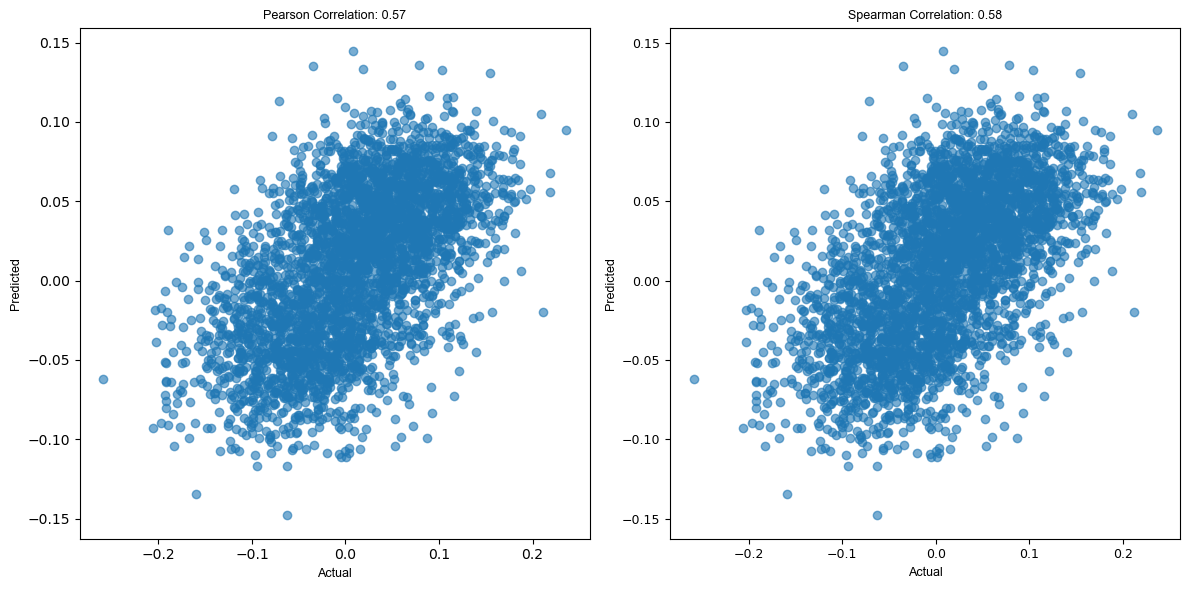

In [29]:

# Calculate Pearson correlation
pearson_corr, _ = pearsonr(combined_df['actual'], combined_df['predicted'])

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(combined_df['actual'], combined_df['predicted'])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pearson Correlation Graph
ax[0].scatter(combined_df['actual'], combined_df['predicted'], alpha=0.7)
ax[0].set_title(f'Pearson Correlation: {pearson_corr:.2f}', fontsize=9, fontname='Arial')
ax[0].set_xlabel('Actual', fontsize=9, fontname='Arial')
ax[0].set_ylabel('Predicted', fontsize=9, fontname='Arial')
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)

# Spearman Correlation Graph
ax[1].scatter(combined_df['actual'], combined_df['predicted'], alpha=0.7)
ax[1].set_title(f'Spearman Correlation: {spearman_corr:.2f}', fontsize=9, fontname='Arial')
ax[1].set_xlabel('Actual', fontsize=9, fontname='Arial')
ax[1].set_ylabel('Predicted', fontsize=9, fontname='Arial')
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)

plt.tight_layout()
plt.show()